# Data Analyst Associate Case Study

## Company Background

Vivendo is a fast food chain with 200+ stores in four locations in Brazil. For the past five years, this fast food chain has experienced incredible growth. To reorganize its legal department, they have hired a new chief legal officer.  

## Customer Question

The chief legal officer has decided to investigate the existing claims records. They want to come up with a plan for the future. They would like you to answer the following questions to help:

- What are the characteristics of the claims in different locations? 
- How much does the claim amount differ from each claim?
- What we can learn from comparing active claims and closed claims?

## Dataset
The data you will use for this analysis can be downloaded from [here](https://s3.amazonaws.com/talent-assets.datacamp.com/restuarant_claims.csv).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
restaurant = pd.read_csv('restuarant_claims.csv')
restaurant.head()

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,0000000-00.2010.0.00.0094,TAX,7/5/2010,17/3/2016,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,0000000-00.2011.0.00.0086,TAX,3/3/2011,NaN,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,0000000-00.2012.0.00.0092,TAX,17/10/2012,NaN,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,0000000-00.2013.0.00.0096,TAX,17/12/2013,2/2/2017,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,0000000-00.2014.0.00.0097,TAX,15/1/2014,5/12/2014,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN


In [3]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LAWSUIT NUMBER     98 non-null     object
 1   AREA               98 non-null     object
 2   CLAIM START DATE   98 non-null     object
 3   CLOSE DATE         14 non-null     object
 4   CLAIM AMOUNT       98 non-null     object
 5   AMOUNT PAID        14 non-null     object
 6   CITY SUBSIDIARIES  98 non-null     object
 7   CONTRACT TYPE      98 non-null     object
 8   SUPPLIER NAME      82 non-null     object
 9   TYPE OF POSITION   82 non-null     object
dtypes: object(10)
memory usage: 7.8+ KB


In [4]:
restaurant.columns = ['lawsuit_number', 'area', 'start_date', 'close_date', 'claim_amount', 'amount_paid', 'city', 'contract_type', 'supplier_name', 'position_type']


In [5]:
restaurant.nunique()

lawsuit_number    98
area               2
start_date        92
close_date        14
claim_amount      74
amount_paid       14
city               4
contract_type      3
supplier_name      4
position_type     10
dtype: int64

In [6]:
restaurant.apply(pd.unique)

lawsuit_number    [0000000-00.2010.0.00.0094, 0000000-00.2011.0....
area                                                   [TAX, LABOR]
start_date        [7/5/2010, 3/3/2011, 17/10/2012, 17/12/2013, 1...
close_date        [17/3/2016, nan, 2/2/2017, 5/12/2014, 9/3/2015...
claim_amount      [R$50,000.00, R$180,000.00, R$70,000.00, R$95,...
amount_paid       [R$15,000.00, nan, R$72,279.00, R$5,800.00, R$...
city                           [RECIFE, SÃO LUÍS, FORTALEZA, NATAL]
contract_type                                       [-, THIRD, OWN]
supplier_name     [nan, OREGON, EAGLE SURVEILLANCE, BLUE'S CLEAN...
position_type     [nan, TELEMARKETING ATTENDANT, VIGILANT II, CL...
dtype: object

## Clean the data

In [7]:
#Convert start_date, close_date to datetime data type
restaurant.close_date = pd.to_datetime(restaurant['close_date'])
restaurant.start_date = pd.to_datetime(restaurant['start_date'])

In [8]:
#In claim_amount and amount_paid columns, clean data and convert them to int data type
for col in ['claim_amount', 'amount_paid']:
    restaurant[col] = restaurant[col].str.split("$").str.get(1)
    restaurant[col] = restaurant[col].str.replace(',', '')
    restaurant[col] = restaurant[col].str.split(".").str.get(0)
    restaurant[col] = restaurant[col].astype('float').astype('Int64')   

In [9]:
#Convert all other object columns to Title case
cols = ['area', 'city', 'contract_type', 'supplier_name', 'position_type']
for col in cols:
    restaurant[col] = restaurant[col].str.title()

In [10]:
#In contract_type column, replace "-" with NA values
restaurant.contract_type = restaurant.contract_type.replace({"-":np.nan})

In [11]:
#In supplier_name column, replace name with NA values if the contract_type is not 'Third'
restaurant.loc[restaurant.contract_type != 'Third', 'supplier_name'] = np.nan

In [12]:
#In position_type column, replace position type with NA values if the area is not "Labor"
restaurant.loc[restaurant.area != 'Labor', 'position_type'] = np.nan

# Analyze the data

### What are the characteristics of the claims in different locations?

Text(0.5, 1.035, 'Claim Amount by Year for Each City')

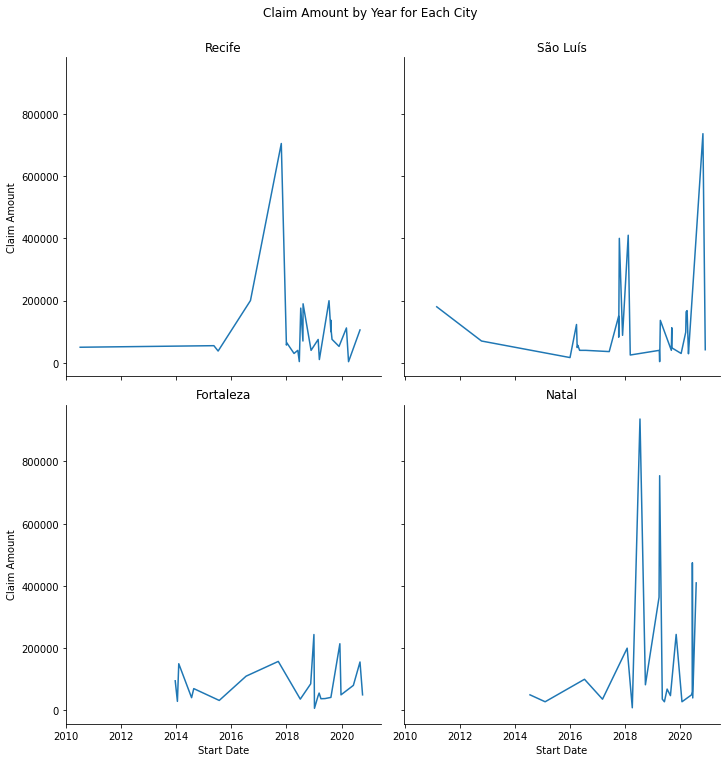

In [13]:
g = sns.relplot(data=restaurant, x='start_date', y='claim_amount', col='city',col_wrap=2, kind='line')
cities = ['Recife', 'São Luís', 'Fortaleza', 'Natal'] 
for ind, ax in enumerate(g.axes.flat):
    ax.set_title(cities[ind])
    ax.set_xlabel('Start Date')
    ax.set_ylabel('Claim Amount')
g.fig.suptitle('Claim Amount by Year for Each City', y=1.035)

The plot above shows the annual amount claim in each city. We can see that the claim amount of Fortaleza is much smaller than that of the other three cities.

Text(0.5, 1.035, 'Number of Each Type of Contract by City')

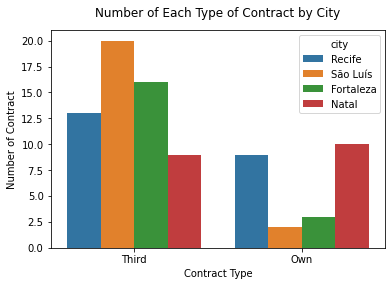

In [14]:
ax = sns.countplot(data=restaurant, x='contract_type', hue='city')
ax.set_xlabel("Contract Type")
ax.set_ylabel("Number of Contract")
ax.set_title("Number of Each Type of Contract by City", y=1.035)

As we can see in the plot above, the contract type is mostly "Third", and São Luís has  the most number of Third contracts.

Text(0.5, 1.035, 'Number of Each Claim Area by City')

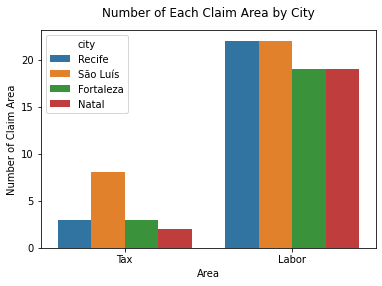

In [15]:
ax = sns.countplot(data=restaurant, x='area', hue='city')
ax.set_xlabel('Area')
ax.set_ylabel('Number of Claim Area')
ax.set_title("Number of Each Claim Area by City", y=1.035)

The plot above indicates that most of the claim area is Labor.

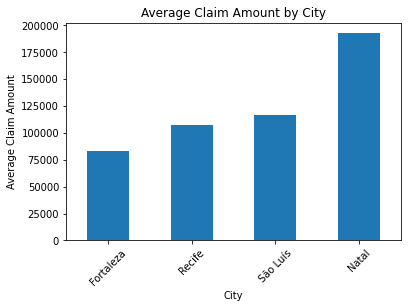

In [16]:
restaurant.groupby('city').claim_amount.mean().sort_values().plot(kind='bar',   xlabel='City', ylabel='Average Claim Amount', title='Average Claim Amount by City')
plt.tick_params(rotation=45, axis='x')

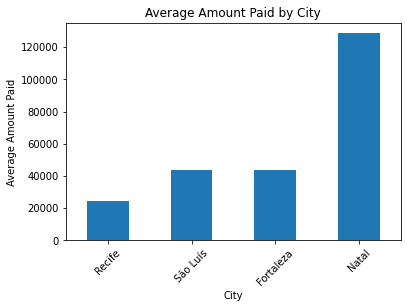

In [17]:
restaurant.groupby('city').amount_paid.mean().sort_values().plot(kind='bar',                 xlabel='City', ylabel='Average Amount Paid', title='Average Amount Paid by City')
                                                                
plt.tick_params(rotation=45, axis='x')

The two plots above show that Natal has the highest average claim amount and average amount paid.

### How much does the claim amount differ from each claim?

<AxesSubplot:xlabel='Start Date', ylabel='Difference in Claim Amount'>

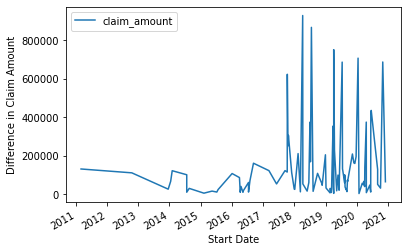

In [18]:
restaurant.set_index('start_date')[['claim_amount']].diff().abs().plot(xlabel='Start Date', ylabel='Difference in Claim Amount')

We can see that there are huge differences in amount claim from each claim in recent years like 2018, 2019, and 2020.

### What we can learn from comparing active claims and closed claims?


In [19]:
active_claims = restaurant.loc[restaurant.close_date.isna()]
closed_claims = restaurant.loc[~restaurant.close_date.isna()]

In [20]:
def plot_active_vs_closed(df1, df2, feature, xlabel):
    fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))
    ax1 = sns.countplot(data=df1, x=feature, ax=ax[0])
    ax2 = sns.countplot(data=df2, x=feature, ax=ax[1])
    ax1.set_title("Active Claims")
    ax2.set_title("Closed Claims")
    ax1.set_xlabel(xlabel)
    ax2.set_xlabel(xlabel)
    ax1.set_ylabel('Number of ' + xlabel)
    ax2.set_ylabel('Number of ' + xlabel)
    if (df1[feature].nunique()) >= 3:
        ax1.tick_params(labelrotation=90)
    plt.suptitle("Number of " + xlabel + " for Each Kind of Claims")

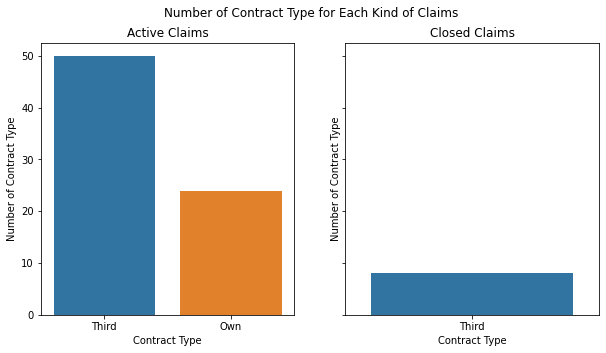

In [21]:
plot_active_vs_closed(active_claims, closed_claims, 'contract_type', 'Contract Type' )

As mentioned above, the third contract type makes up the total majority of total contracts. And, there is no own contract type in the closed claims.

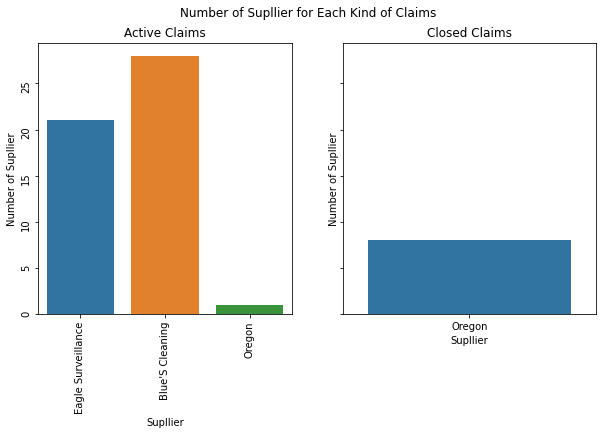

In [22]:
plot_active_vs_closed(active_claims, closed_claims, 'supplier_name', 'Supllier' )

We can see that Blues'S Cleaning is the supplier which has most claims. Also, Oregon is the only supplier for the closed claims.

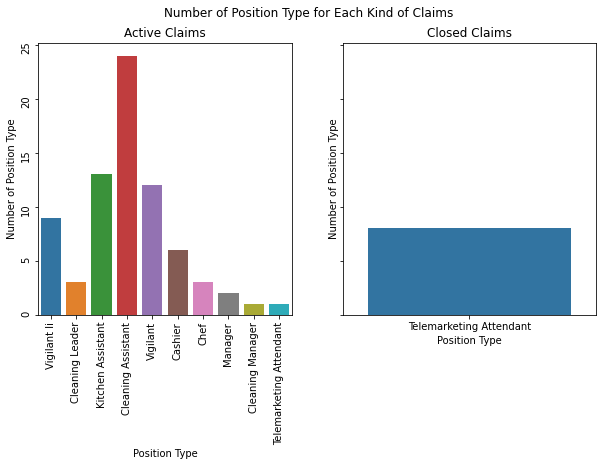

In [23]:
plot_active_vs_closed(active_claims, closed_claims, 'position_type', 'Position Type' )

Most of the position type is cleaning assistant for the active claims. Telemarketing Attendant is the only position type for the closed claims.

### Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

- First, rename the column names to make them easier to read and access.
- Convert start_date, close_date columns to datetime data type.
- Clean claim_amount, amount_paid columns and then convert them to integer data type.
- Make all other category columns title case.
- In contract_type column, replace "-" with NA values.
- In supplier_name, replace values with NA values if the values in contract_type column is not "Third".
- In position_type, replace values with NA values if the values in area columns is not "Labor".

### Data Discovery and Visualization

1. Based on the plots below, we can see that:
- The annual claim amount of Fortaleza city is much smaller than that of the other three cities.
- Most of the contract type is "Third", and São Luís has the most number of Third contracts.
- Also, most the of claim area is "Labor".
- The average amount claim and the average amount paid in Natal city are higher than those in the other cities.

2. There are huge differences in amount claim from each claim in recent years like 2018, 2019, and 2020. The largest difference between two claims is about $900,000.


3. Comparing active claims and closed claims, we can see that
- For active claims, 
	- the third contract type makes up the total majority of total contracts. 
    - Blues'S Cleaning is the supplier which has most claims.
    - Most of the position type is cleaning assistant for the active claims.
- For closed claims,     
    - Telemarketing Attendant is the only position type for the closed claims.  
    - Oregon is the only supplier for the closed claims.
	- there is no own contract type in the closed claims.
